#Patel Mahi Govindbhai - D24AIML089

## 1. Importing Required Libraries
We load essential Python libraries for data manipulation, visualization, and model building:

In [ ]:
# Step 1:Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


## 2. Load the Dataset
  load the diabetes dataset using `pd.read_csv()`:

In [ ]:
# Step 2:load dataset
df = pd.read_csv('/content/diabetes-data.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3. Preview the Data
We preview the dataset to get a feel of structure and values:

- Confirms columns like **Glucose, BMI, Age**, etc.  
- Helps identify data types and typical values

In [ ]:
# Step 3: View First 5 Rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4. Data Structure Inspection
We use `df.info()` to inspect the structure of the dataset:

- Checks non-null values and column data types.


In [ ]:
#check null value
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Step 4:Structure of Dataset (info)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 5. Statistics
 Use `df.describe()` to get numerical summaries:

- Helps detect outliers and unrealistic zeros  
- **Glucose, Insulin, BMI** show min values of 0 — a clear red flag

In [ ]:
# Step 5: Statistics
df.describe().T  # Transpose


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#check duplicate value
df.duplicated().sum()

np.int64(0)

## 6. Create a Copy for Cleaning
 Create a backup of the dataset:

- Uses `data = df.copy()`  
- Ensures original dataset remains untouched

In [ ]:
# Step 6: Create a Safe Copy
data = df.copy()


## 7. Data Cleaning
Identify and replace unrealistic 0s in medical features:

- Columns fixed: **Glucose, BloodPressure, SkinThickness, Insulin, BMI**  
- Replaced 0s with `np.nan`  
- Makes it easier to handle missing values  

In [ ]:
# Step 7: Checking for Missing Values
columns_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zero_invalid] = data[columns_with_zero_invalid].replace(0, np.nan)
data.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 8. Data Visualization - Histograms
We plot histograms for all features:

- Visualize distributions  
- Easy to spot skewness and mass of zero entries  
- Some features like **Insulin** have large zero spikes  

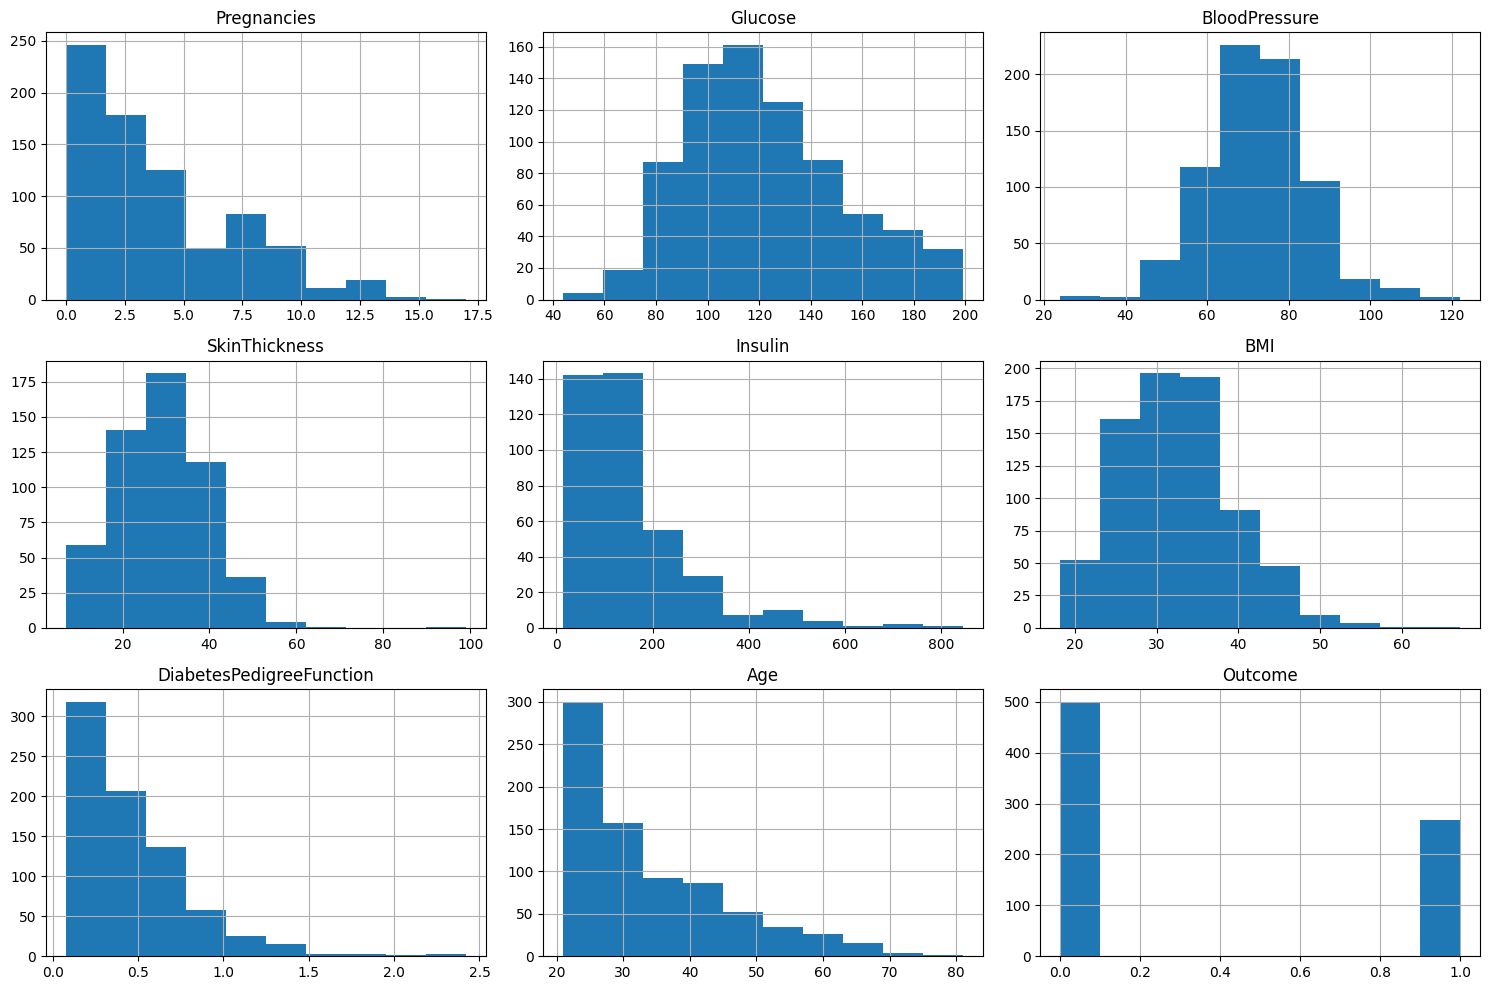

In [ ]:
# Step 8: Visualizing Data Distributions with Histograms
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


## 9. Replace Missing Values with Median
Replace `NaN` values using **median imputation**:

- Ensures dataset is clean and ready for modeling

In [ ]:
# Step 9: Fix Zero Values with Median
for col in columns_with_zero_invalid:
    data[col].fillna(data[col].median(), inplace=True)


## 10. Dataset Shape
Wheck the size of the cleaned dataset:

- Confirms total rows and columns  


In [ ]:
# Step 10: Check Dataset Size
data.shape

(768, 9)

## 11. Class Distribution
The `Outcome` column for class balance:

- Imbalance found: more 0s (non-diabetic) than 1s (diabetic)  
- Indicates need for class balancing before training

In [ ]:
# Step 11: How Many People Have Diabetes
data['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


## 12. Pairwise Relationships (Scatter Matrix)
We use `scatter_matrix()` for initial relationships:

- Highlights correlations and spread  
- Outliers are clearly visible in **Insulin** and **Age**

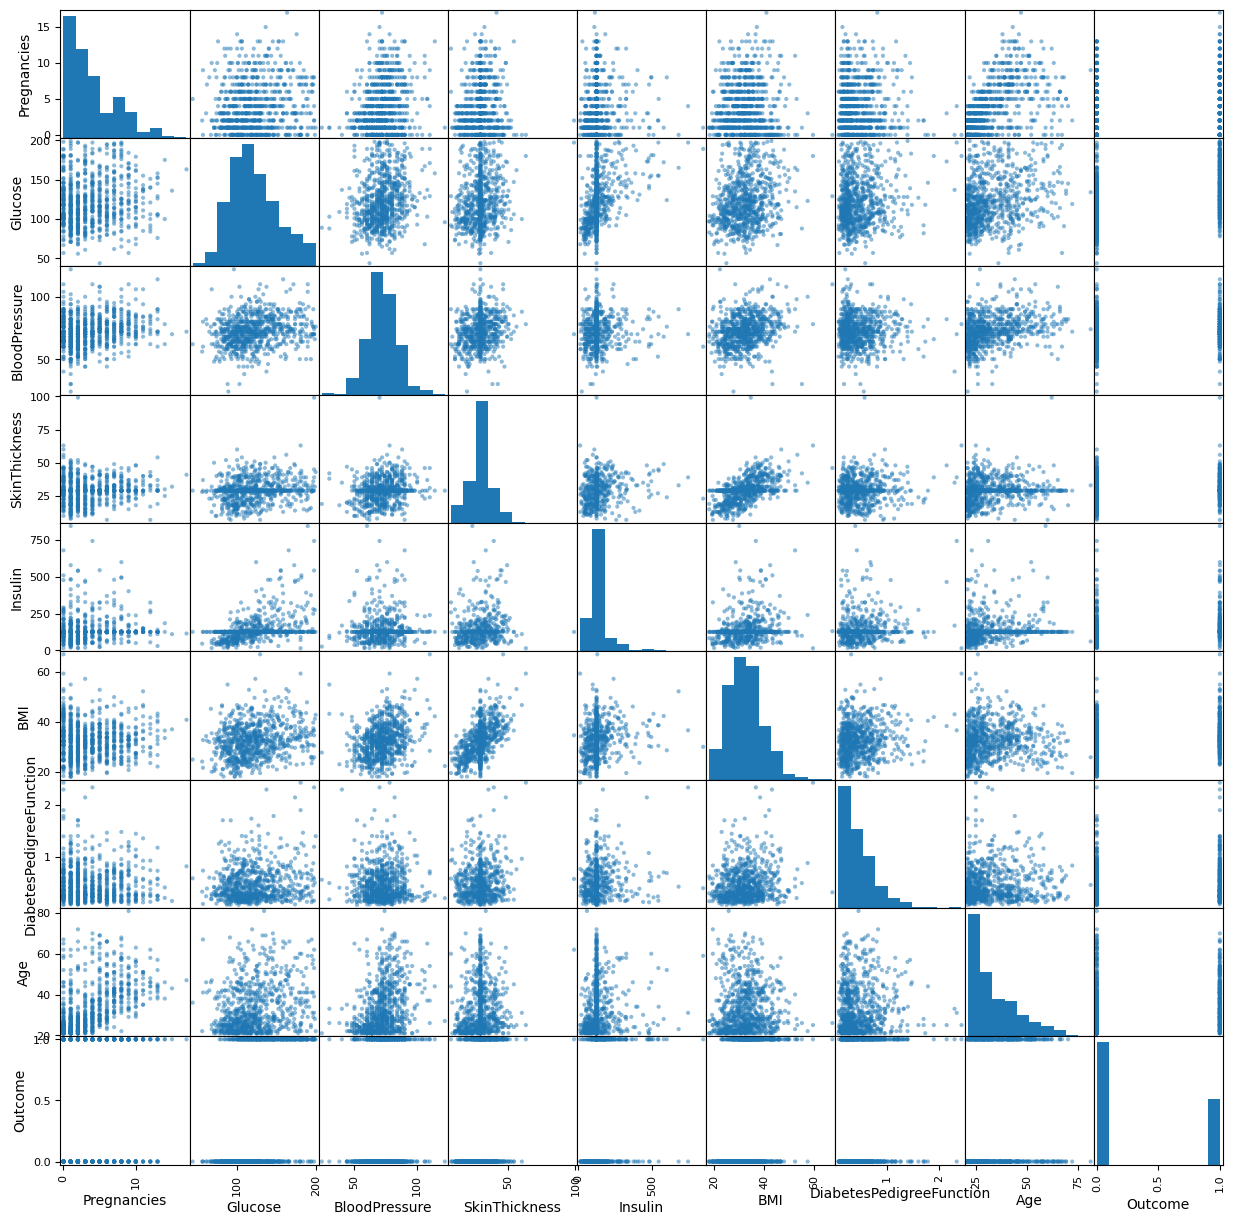

In [ ]:
# Step 12: Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(15, 15))
plt.show()


## 13. Class-Based Pairplot
 `sns.pairplot()` with `hue='Outcome'`:

- Colors diabetic vs non-diabetic points  
- Clear patterns visible for features like **Glucose**, **BMI**

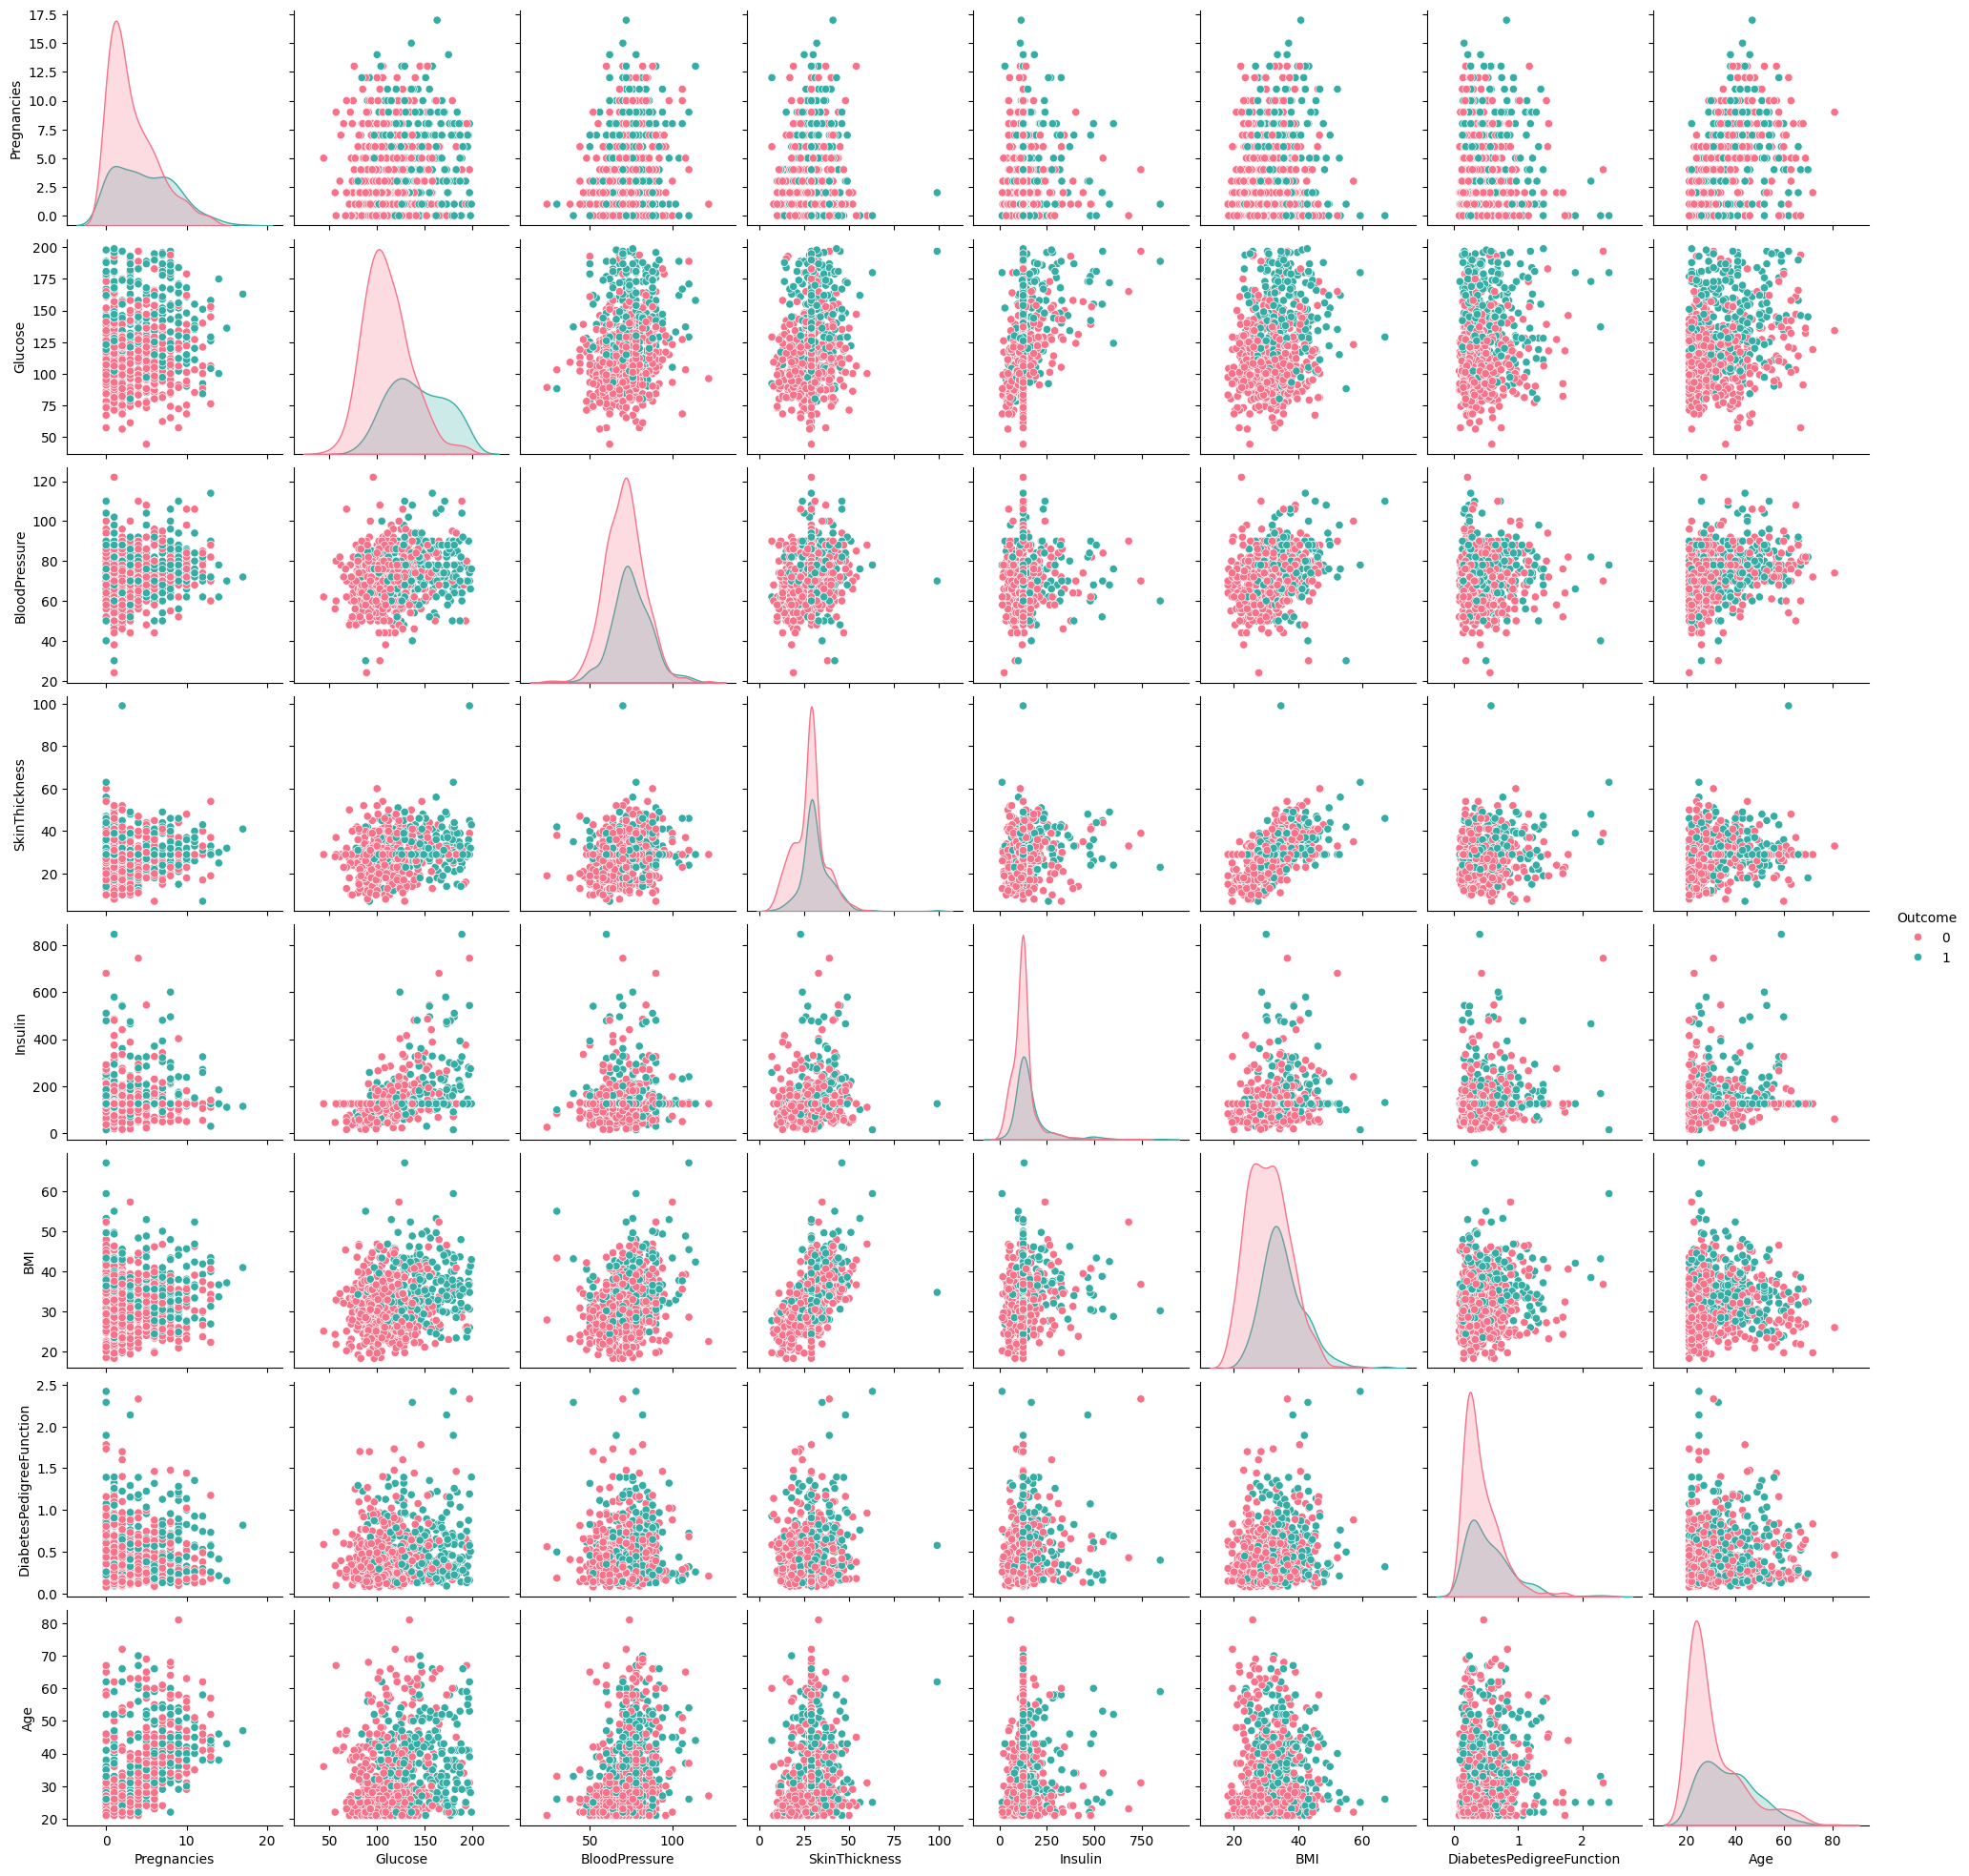

In [ ]:
# Step 13: Scatter Matrix with hue='Outcome'
sns.pairplot(data, hue='Outcome', palette='husl')
plt.show()


## 14. Heatmap of Feature Correlations
Heatmap to visualize correlations:

- **Glucose** has highest correlation with diabetes  
- Helps identify key features for modeling

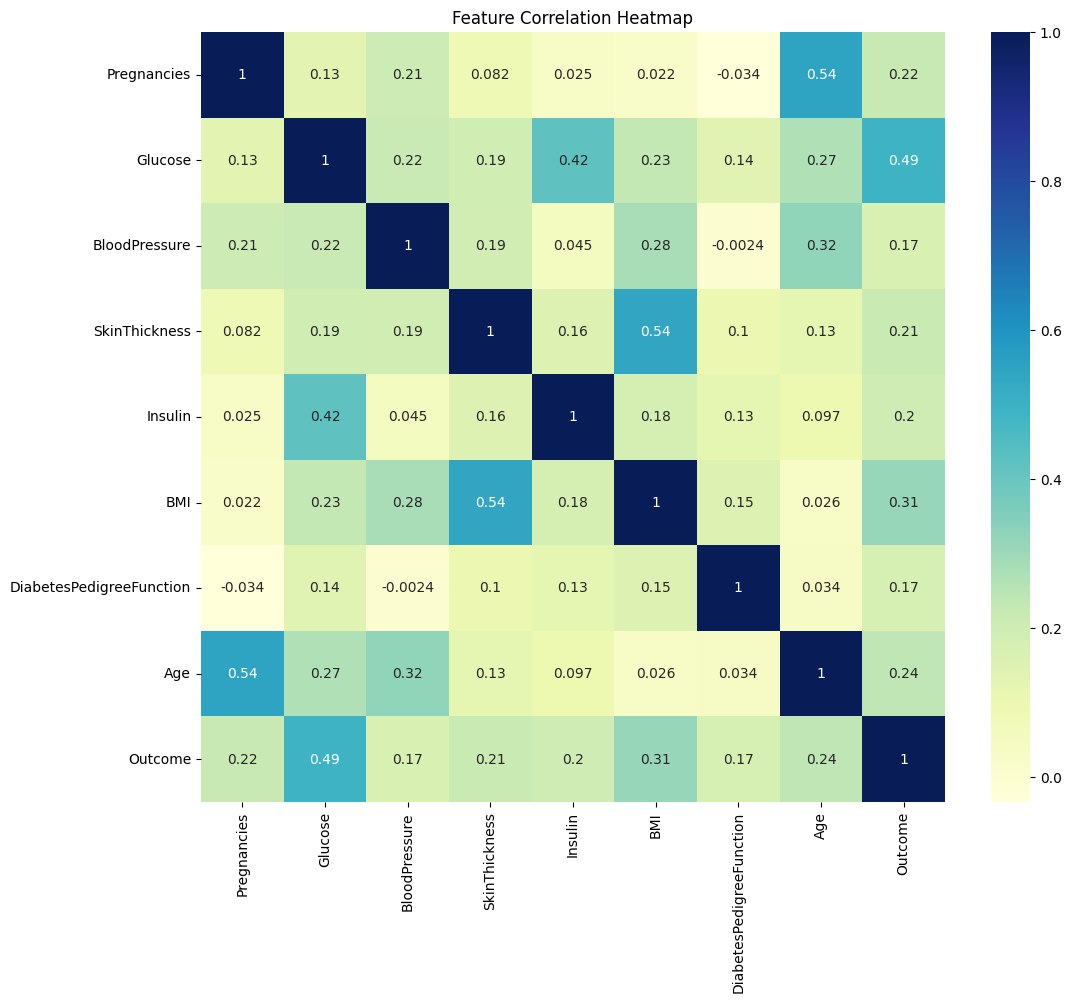

In [ ]:
# Step 14: Heatmap of Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


## 15. Feature Scaling
Scale features using `StandardScaler()`:

- Required for distance-based models like **KNN**  
- Makes all features have **mean 0** and **standard deviation 1**

In [ ]:
# Step 15: Feature Scaling
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


## 16. Train-Test Split
Split the data into training and testing sets:

- Uses 67% for training, 33% for testing  
- Stratified to maintain class balance in splits

In [ ]:
# Step 16: Train-Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.33, random_state=42, stratify=y)


## 17. Fix Imbalance with SMOTE
Apply **SMOTE** to balance the training data:

- Generates synthetic samples of minority class (diabetic)  
- Prevents bias in model training

In [ ]:
# Step 17: Balance Training Data using SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


## 18. KNN Accuracy Testing (1 ≤ k ≤ 14)
Test different **K** values for the **KNN classifier**:

- Trains model with k=1 to 14  
- Stores training and testing accuracy for comparison

In [ ]:
# Step 18: Find Best K for KNN
train_scores = []
test_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sm, y_train_sm)
    train_scores.append(knn.score(X_train_sm, y_train_sm))
    test_scores.append(knn.score(X_test, y_test))


## 19. Identify Best k Value
Print best-performing **k** values:

- Selects the k with highest **test accuracy**  
- Avoids overfitting by ignoring k with highest **training accuracy** only

In [ ]:
# Step 19: Best Accuracy
best_train_k = np.argmax(train_scores) + 1
best_test_k = np.argmax(test_scores) + 1
print(f"Best training accuracy at k={best_train_k} => {train_scores[best_train_k-1]:.4f}")
print(f"Best testing accuracy at k={best_test_k} => {test_scores[best_test_k-1]:.4f}")


Best training accuracy at k=1 => 1.0000
Best testing accuracy at k=8 => 0.7795


## 20. Accuracy vs k Plot
Plot training and testing accuracy across all **K** values:

- Visual way to choose optimal **K**  
- Good K should have high test accuracy and not overfit

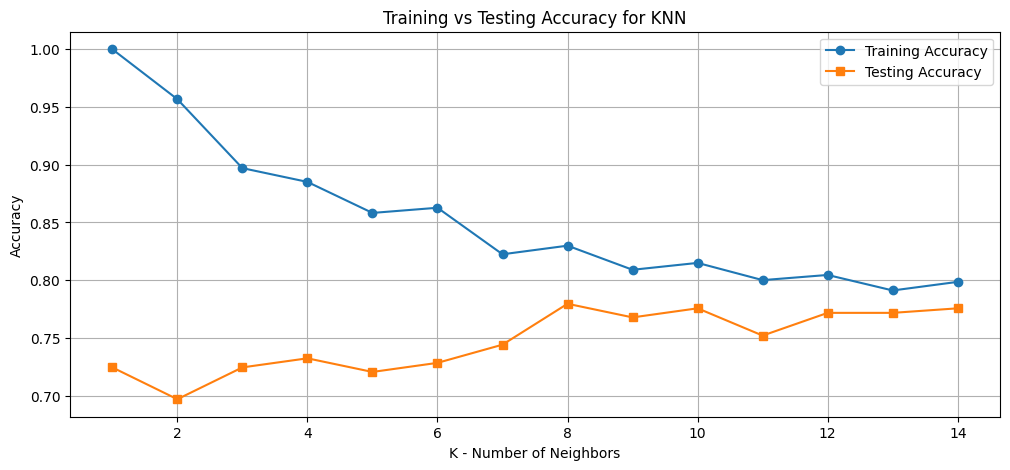

In [ ]:
# Step 20: Plot Training vs Testing Accuracy
plt.figure(figsize=(12, 5))
plt.plot(range(1, 15), train_scores, marker='o', label='Training Accuracy')
plt.plot(range(1, 15), test_scores, marker='s', label='Testing Accuracy')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for KNN')
plt.legend()
plt.grid(True)
plt.show()


## 21. Final Model Training
Train final **KNN model** using best test **K**:

- Fits model on **SMOTE-balanced training set**  
- Evaluates accuracy on **test set**  

In [ ]:
# Step 21: Final Model with Best Test Accuracy K
final_k = best_test_k
knn_final = KNeighborsClassifier(n_neighbors=final_k)
knn_final.fit(X_train_sm, y_train_sm)
y_pred = knn_final.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final KNN Accuracy (k={final_k}): {accuracy:.4f}")


Final KNN Accuracy (k=8): 0.7795


## 22. Final Evaluation (Precision, Recall, F1 Score)
Evaluate the model using:

- **Precision**: Accuracy of positive predictions  
- **Recall**: Ability to find all positive cases  
- **F1 Score**: Balance between precision and recall  
- **Classification Report**: Gives precision, recall, F1 for both classes

In [ ]:
# Step 22: Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       165
           1       0.67      0.73      0.70        89

    accuracy                           0.78       254
   macro avg       0.76      0.77      0.76       254
weighted avg       0.79      0.78      0.78       254

Precision: 0.6701
Recall:    0.7303
F1 Score:  0.6989


---

## Conclusion

 - In this project, we developed a machine learning pipeline to predict diabetes using patient health indicators from the PIMA Indians Diabetes dataset. The process began with thorough data exploration and cleaning, where we identified and treated invalid zero entries using median imputation.

 - We visualized feature distributions and relationships, revealing that Glucose, BMI, and Age were highly informative for prediction. After handling class imbalance using **SMOTE**, we trained and evaluated multiple **KNN** classifiers with varying `k` values. By comparing training and testing accuracy, we selected the best-performing model that balanced generalization and accuracy.

 - Finally, using metrics like **precision**, **recall**, and **F1 score**, we assessed the classifier’s performance. The results demonstrate that KNN, when properly tuned and balanced, can effectively predict diabetes cases based on key medical attributes.

 - This pipeline sets a strong foundation for real-world predictive healthcare applications and can be further improved using ensemble methods, feature engineering, or deployment in health-monitoring systems.
